In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
Social_Ads=pd.read_csv('Social_Network_Ads.csv')
Social_Ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [29]:
Social_Ads.shape

(400, 5)

In [30]:
Social_Ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [31]:
# Converting Categorical data to Numerical Data
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

# Numerical Value is Assigned Male = 1, Female =0
Social_Ads['Gender']=labelencoder.fit_transform(Social_Ads['Gender'])
Social_Ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [32]:
Social_Ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int32
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 14.2 KB


In [33]:
X = Social_Ads.iloc[:, [1,2,3]].values
y = Social_Ads.iloc[:, 4].values
X

array([[    1,    19, 19000],
       [    1,    35, 20000],
       [    0,    26, 43000],
       ...,
       [    0,    50, 20000],
       [    1,    36, 33000],
       [    0,    49, 36000]], dtype=int64)

In [34]:
#data Normalization
from sklearn import preprocessing
X =preprocessing.StandardScaler().fit_transform(X)
X

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.98019606,  1.17910958, -1.46068138],
       [ 1.02020406, -0.15807423, -1.07893824],
       [-0.98019606,  1.08359645, -0.99084367]])

In [35]:
#Train Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


# Selecting K Value

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

acc_lst=[]
err_lst=[]
for i in range(1,25):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred =model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    acc_lst.append(acc)
    err_lst.append(1-acc)

<function matplotlib.pyplot.show(*args, **kw)>

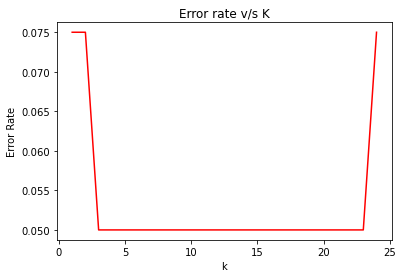

In [37]:
plt.plot(list(range(1,25)),err_lst,c='r')
plt.title('Error rate v/s K')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.show

In [38]:
#Training and Predicting
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors = 5)
knnmodel.fit(X_train,y_train)
ypredict = knnmodel.predict(X_test)

In [39]:
#Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,ypredict)
acc


0.95

In [40]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypredict)
cm

array([[55,  3],
       [ 1, 21]], dtype=int64)

In [41]:
#output visualization
prediction_output =pd.DataFrame(data=[y_test,ypredict],index=['y_test','ypredict'])


In [42]:
prediction_output.transpose()

,y_test,ypredict
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
75,0,0
76,0,0
77,0,0
78,1,1
